Nama Kelompok : Scooby Doo

Nama Anggota : 

1.Yosafat Respati

2.Ridho Fajar

3.Li'izza Diana M

4.Teguh Tri A

5.Vito Rihaldijiran

6.M Supian Noor

7.Rexy Anggala Putra




In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn import under_sampling, over_sampling

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# **CLEANSING DATA**

# **Handle Missing Value**

In [4]:
#cek missing value
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
#semua kolom yang terdapat missing value dilakukan impute menggunakan median dari setiap kolomnya
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].median())
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())

In [6]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# **Handle Duplicate Data**

In [7]:
df.duplicated().sum()

0

Tidak terdapat duplicate pada data

# **Handle Outlier**

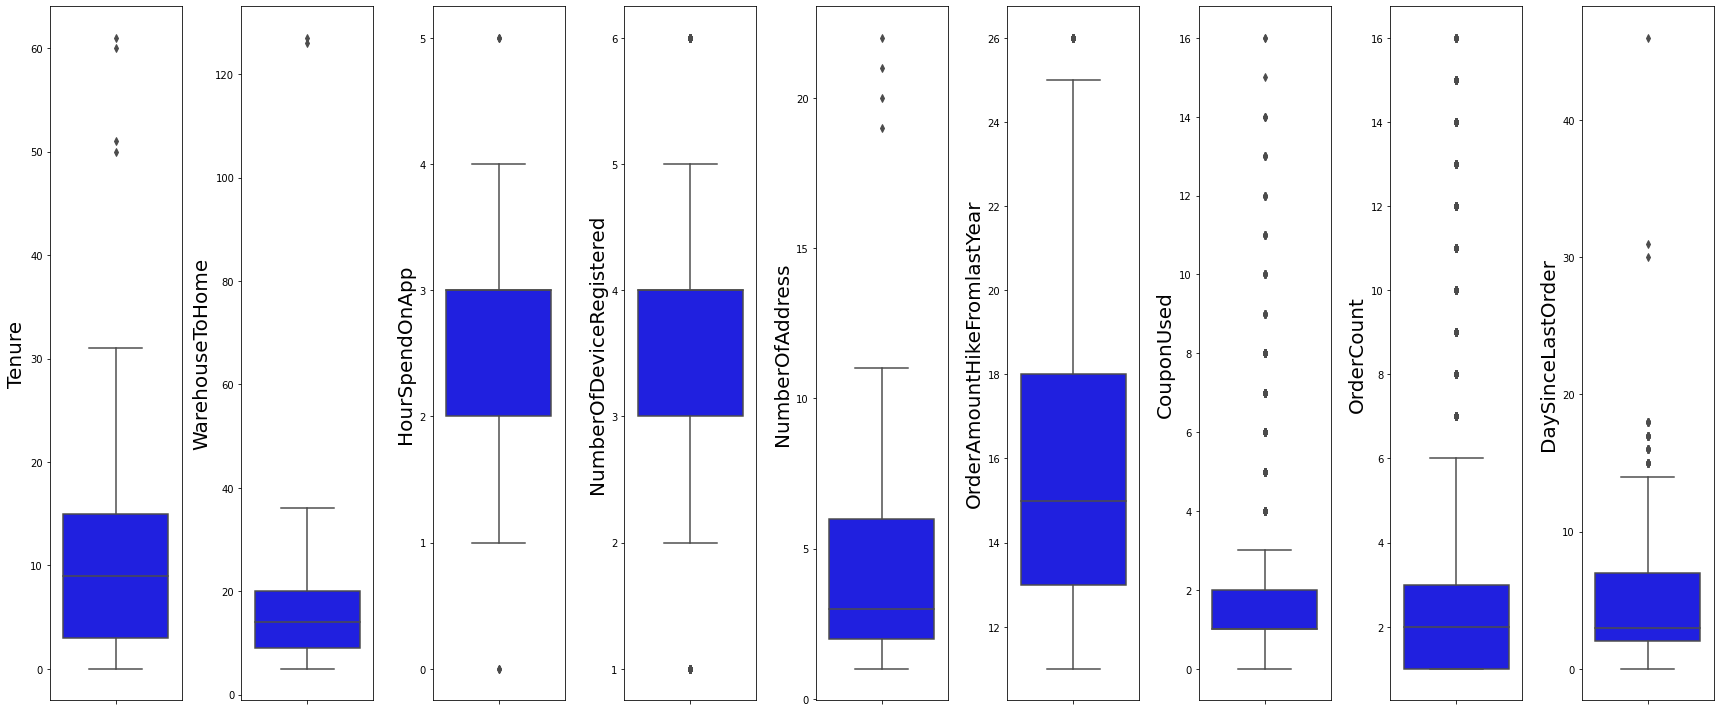

In [8]:
outlier_var = ['Tenure', 'WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered', 'NumberOfAddress','OrderAmountHikeFromlastYear',
              'CouponUsed', 'OrderCount', 'DaySinceLastOrder'] 

plt.figure(figsize=(24, 10))
for i in range(0, len(outlier_var)):
    plt.subplot(1, len(outlier_var), i+1)
    sns.boxplot(y=df[outlier_var[i]], color='blue', orient='v')
    plt.ylabel(outlier_var[i], fontsize=20)
    plt.tight_layout()

In [9]:
#handling outlier
for i in outlier_var :
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  low_limit=q1-(iqr*1.5)
  high_limit=q3+(iqr*1.5)
  df = df[(df[i]>=low_limit) & (df[i]<=high_limit)]

df.shape

(3827, 20)

In [10]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


Setelah dilakukan handling outlier, jumlah row data dari 5630 berkurang menjadi 3827

In [11]:
#handling redundan value
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['Cash on Delivery','Credit Card'],['COD','CC'])

In [12]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# **Feature Transformation**

In [13]:
#One Hot Encoding
one_hot_var = ['PreferredPaymentMode', 'PreferredLoginDevice', 'PreferedOrderCat', 'MaritalStatus']

for i in one_hot_var :
    onehots = pd.get_dummies(df[i], prefix=i)
    df = df.join(onehots)

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,PreferredLoginDevice_Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,1,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,1,0,0,1,0,0,0,0,0,1
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,...,1,0,0,0,1,0,0,0,0,1


In [14]:
df = df.drop(columns=['PreferredPaymentMode', 'PreferredLoginDevice', 'PreferedOrderCat', 'MaritalStatus'])

In [15]:
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredLoginDevice_Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,Female,3.0,3,2,9,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,9.0,1,8.0,Male,3.0,4,3,7,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,9.0,1,30.0,Male,2.0,4,3,6,...,1,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,Male,2.0,4,5,8,...,1,0,0,1,0,0,0,0,0,1
4,50005,1,0.0,1,12.0,Male,3.0,3,5,3,...,1,0,0,0,1,0,0,0,0,1


In [16]:
#Label encoding
mapping_gender = {
    'Female' : 0,
    'Male' : 1
    }

df['Gender'] = df['Gender'].map(mapping_gender)

df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredLoginDevice_Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,0,3.0,3,2,9,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,9.0,1,8.0,1,3.0,4,3,7,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,9.0,1,30.0,1,2.0,4,3,6,...,1,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,1,2.0,4,5,8,...,1,0,0,1,0,0,0,0,0,1
4,50005,1,0.0,1,12.0,1,3.0,3,5,3,...,1,0,0,0,1,0,0,0,0,1


# **Feature Transformation**

In [17]:
#Normalization
minmax = df[['HourSpendOnApp','SatisfactionScore']]
minmax_features = MinMaxScaler().fit_transform(minmax.values)
minmax_features_df = pd.DataFrame(minmax_features, index=minmax.index, columns=minmax.columns)

for i in minmax_features_df.columns:
  df[i]=minmax_features_df[i]

#Standardization
ssv=df[['Tenure','WarehouseToHome','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']]
scaled_features = StandardScaler().fit_transform(ssv.values)
scaled_features_df = pd.DataFrame(scaled_features, index=ssv.index, columns=ssv.columns)

for i in scaled_features_df.columns:
  df[i]=scaled_features_df[i]

df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredLoginDevice_Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,-0.647125,3,-1.189416,0,0.666667,-0.903938,0.25,1.816800,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,-0.033419,1,-0.936189,1,0.666667,0.346286,0.50,1.040287,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,-0.033419,1,1.849317,1,0.333333,0.346286,0.50,0.652031,...,1,0,0,0,1,0,0,0,0,1
3,50004,1,-1.138089,3,-0.049891,1,0.333333,0.346286,1.00,1.428543,...,1,0,0,1,0,0,0,0,0,1
4,50005,1,-1.138089,1,-0.429733,1,0.666667,-0.903938,1.00,-0.512738,...,1,0,0,0,1,0,0,0,0,1


In [18]:
# pemisahan features dan target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Churn', 'CustomerID']]]
X = df.drop('Churn',1)
y = df['Churn'].values
print(X.shape)
print(y.shape)

(3827, 32)
(3827,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


#**Handle Data Imbalance**

In [19]:
# checking jumlah tiap label pada kolom target
df['Churn'].value_counts()

0    3133
1     694
Name: Churn, dtype: int64

In [20]:
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


Original
0    3133
1     694
dtype: int64


UNDERSAMPLING
0    1388
1     694
dtype: int64


OVERSAMPLING
0    3133
1    1566
dtype: int64


SMOTE
1    3133
0    3133
dtype: int64


In [21]:
newX=X_over_SMOTE
newX

,CustomerID,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredLoginDevice_Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,-0.647125,3,-1.189416,0,0.666667,-0.903938,0.250000,1.816800,1,...,0,0,0,1,0,0,0,0,0,1
1,50002,-0.033419,1,-0.936189,1,0.666667,0.346286,0.500000,1.040287,1,...,1,0,0,0,1,0,0,0,0,1
2,50003,-0.033419,1,1.849317,1,0.333333,0.346286,0.500000,0.652031,1,...,1,0,0,0,1,0,0,0,0,1
3,50004,-1.138089,3,-0.049891,1,0.333333,0.346286,1.000000,1.428543,0,...,1,0,0,1,0,0,0,0,0,1
4,50005,-1.138089,1,-0.429733,1,0.666667,-0.903938,1.000000,-0.512738,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6261,55450,-1.015348,1,0.187361,0,0.687695,0.346286,1.000000,-0.512738,0,...,0,0,0,0,0,0,0,0,0,0
6262,54585,-1.015348,1,-0.781836,1,0.703181,1.596510,0.054771,-0.342616,0,...,0,0,0,0,0,1,0,0,0,1
6263,50233,-0.060094,3,-1.088522,0,0.345407,0.346286,0.740945,-0.886931,1,...,0,0,0,0,0,0,0,0,0,0
6264,53374,-1.015348,2,1.243140,1,0.666667,1.530865,0.763127,-0.512738,0,...,0,0,0,0,0,1,0,0,0,0


# **FEATURE ENGINEERING**

# **Feature Selection**

Pada tahap ini, kami tidak menghapus suatu feature sebagai pertimbangan penggunaan semua feature pada tahap modelling

# **Feature Extraction**

Pada feature extraction ini kami menambahkan kolom avg_totalbelanja, aov dan gmv, dengan penjelasan sebegai berikut:

avg_totalbelanja = rata-rata total uang belanja yang harus dibayarkan sebelum coupon/voucher digunakan

aov (average order value)= rata-rata jumlah uang yang dibelanjakan setiap customer tiap bulan

gmv (gross merchandise value)= total pembelian yg terjadi tiap bulan

Pada case ini kamu mengamsumsikan voucher/coupun yang diberikan ecommerce sebesar 10%

In [22]:
newX['avg_totalbelanja']=newX['CashbackAmount']*10
newX['aov']=newX['avg_totalbelanja']*0.9
newX['gmv']=newX['aov']*newX['OrderCount']
newX

,CustomerID,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,avg_totalbelanja,aov,gmv
0,50001,-0.647125,3,-1.189416,0,0.666667,-0.903938,0.250000,1.816800,1,...,1,0,0,0,0,0,1,-1.848515,-1.663664,1.797703
1,50002,-0.033419,1,-0.936189,1,0.666667,0.346286,0.500000,1.040287,1,...,0,1,0,0,0,0,1,-11.044724,-9.940251,10.741126
2,50003,-0.033419,1,1.849317,1,0.333333,0.346286,0.500000,0.652031,1,...,0,1,0,0,0,0,1,-11.190807,-10.071727,10.883194
3,50004,-1.138089,3,-0.049891,1,0.333333,0.346286,1.000000,1.428543,0,...,1,0,0,0,0,0,1,-7.941622,-7.147460,7.723322
4,50005,-1.138089,1,-0.429733,1,0.666667,-0.903938,1.000000,-0.512738,0,...,0,1,0,0,0,0,1,-8.994839,-8.095355,8.747588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6261,55450,-1.015348,1,0.187361,0,0.687695,0.346286,1.000000,-0.512738,0,...,0,0,0,0,0,0,0,-0.421845,-0.379661,-0.201607
6262,54585,-1.015348,1,-0.781836,1,0.703181,1.596510,0.054771,-0.342616,0,...,0,0,1,0,0,0,1,-3.694140,-3.324726,-1.765496
6263,50233,-0.060094,3,-1.088522,0,0.345407,0.346286,0.740945,-0.886931,1,...,0,0,0,0,0,0,0,-10.487847,-9.439062,10.199557
6264,53374,-1.015348,2,1.243140,1,0.666667,1.530865,0.763127,-0.512738,0,...,0,0,1,0,0,0,0,-4.323919,-3.891527,-2.066479
